# Part_1

## 1.Importing the technologies

In [1]:
import pandas as pd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
import tensorflow as tf

2025-10-16 14:02:13.734908: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 14:02:14.346993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-16 14:02:14.347188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-16 14:02:14.428421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-16 14:02:14.657963: I tensorflow/core/platform/cpu_feature_guar

## 2.Getting the dataset

In [2]:
train_data= pd.read_csv(filepath_or_buffer="/home/tarefbilel/IA/Deep_Learning/NLP/part_1/nlp_getting_started/train.csv")
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
test_data= pd.read_csv("/home/tarefbilel/IA/Deep_Learning/NLP/part_1/nlp_getting_started/test.csv")
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## 3.Exploratory data analysis

In [4]:
len(train_data), len(test_data)

(7613, 3263)

Text(0.5, 0, 'Disaster')

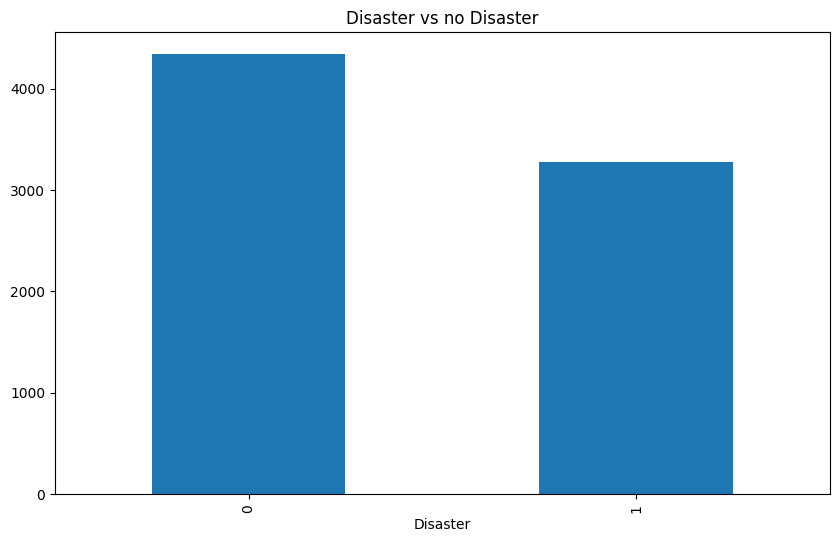

In [5]:
plt.figure(figsize=(10,6))
plt.title("Disaster vs no Disaster")
train_data["target"].value_counts().plot.bar().set_xlabel("Disaster")

In [6]:
import random 
random_index= random.randint(1, len(train_data)-5)

for row in train_data[["text","target"]][random_index:random_index+5].itertuples():
 _,text, target= row 
 print(f"Target: {target}","(real disaster)" if target>0 else "(no disaster)")
 print(f"Text:\n{text}\n")
 print("----\n")

Target: 0 (no disaster)
Text:
@Collapsed thank u

----

Target: 0 (no disaster)
Text:
I liked a @YouTube video from @sqwizzix http://t.co/GGqCz9AB6u Call of Duty: ÛÏThe Piano EntertainerÛ Ep. 9 ÛÒ Musicians Collide!

----

Target: 0 (no disaster)
Text:
And when those waves shall ripple collide it's on the tide of YOUR LOVE I will survive. #love @LesleyChappelle

----

Target: 0 (no disaster)
Text:
Somehow find you and I collide http://t.co/Ee8RpOahPk

----

Target: 0 (no disaster)
Text:
But even if the stars and moon collide I never want you back into my life??????.

----



## 4.Splitting the data

In [7]:
from sklearn.model_selection import train_test_split 

train_sentences,val_sentences,train_labels,val_labels= train_test_split(train_data["text"].to_numpy(),
                                                                        train_data["target"].to_numpy(),
                                                                        test_size=0.2,
                                                                        random_state=42)

In [8]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6090, 1523, 6090, 1523)

## 5.Text vectorization

In [9]:
text_vector= tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=None,
                                                                          standardize= 'lower_and_strip_punctuation',
                                                                          split="whitespace",
                                                                          ngrams=None,
                                                                          output_mode="int",
                                                                          output_sequence_length=None
                                                                          )

2025-10-16 14:02:21.461126: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-16 14:02:21.722417: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-16 14:02:21.722489: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-16 14:02:21.724394: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-10-16 14:02:21.724434: I external/local_xla/xla/stream_executor

In [10]:
max_vocab_length=10000
max_length=15

text_vector= tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_vocab_length,
                                                                          output_mode="int",
                                                                          output_sequence_length=max_length)

In [11]:
text_vector.adapt(train_sentences)

In [12]:
try_sent= "Hello world i'm learning tensorflow"
text_vector([try_sent])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1700,  103,   32, 2209,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [13]:
ran_sent= random.choice(train_sentences)
print(f"The random sentence is {ran_sent}")
text_vector([ran_sent])

The random sentence is Las Vegas in top 5 cities for red-light running fatalities - News3LV http://t.co/eXdbcx4gCR


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[4786, 2999,    4,  249,  181, 2843,   10, 8479,  951,  331, 9615,
           1,    0,    0,    0]])>

## 6.Embedding layers

In [14]:
embedding= tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     input_length=max_length)

In [15]:
ran_sent= random.choice(train_sentences)
print(f"The original sentence is: {ran_sent}\n")
sample_embedding= embedding(text_vector([ran_sent]))

print(f"\nThe embedded version is:{sample_embedding}")

The original sentence is: I'm my own woman crush ????


The embedded version is:[[[-0.02131008  0.01913479  0.00831056 ...  0.03897942  0.02798018
   -0.02041554]
  [ 0.02925861 -0.04247105 -0.04886555 ... -0.02338256 -0.00611087
    0.0068239 ]
  [-0.02193948 -0.00661594 -0.01938523 ...  0.03007299  0.04621918
   -0.00608744]
  ...
  [ 0.0192288  -0.0451205  -0.01026305 ...  0.03245825 -0.01952075
   -0.0249638 ]
  [ 0.0192288  -0.0451205  -0.01026305 ...  0.03245825 -0.01952075
   -0.0249638 ]
  [ 0.0192288  -0.0451205  -0.01026305 ...  0.03245825 -0.01952075
   -0.0249638 ]]]


In [16]:
round(sum(len(i.split()) for i in train_sentences) / len(train_sentences))


15

## 7.Model_0

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline

model_0= Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

,steps,"[('tf-idf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [18]:
model_0_eval= model_0.score(val_sentences,val_labels)

print(f"Our baseline model achieve {model_0_eval*100:.2f}% accuracy")

Our baseline model achieve 79.97% accuracy


In [19]:
model_0_pred= model_0.predict(val_sentences)
model_0_pred

array([0, 0, 0, ..., 1, 1, 0])

In [20]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [21]:
def evaluation(y_true,y_pred):
    model_results={
        'accuracy': accuracy_score(y_true,y_pred)*100,
        'Recall': recall_score(y_true,y_pred)*100,
        'Precision': precision_score(y_true,y_pred)*100,
        'f1_score': f1_score(y_true,y_pred)*100
    }
    return model_results

In [22]:
model_0_results= evaluation(val_labels,model_0_pred)

In [23]:
model_0_results

{'accuracy': 79.97373604727511,
 'Recall': 63.02003081664098,
 'Precision': 86.28691983122363,
 'f1_score': 72.84060552092609}

In [24]:
model_0_results_df= pd.DataFrame(model_0_results,index=["Score"])
model_0_results_df

,accuracy,Recall,Precision,f1_score
Score,79.973736,63.020031,86.28692,72.840606


## 8.Model_1

In [25]:
inputs= tf.keras.layers.Input(shape=(1,),dtype="string")
x= text_vector(inputs)
x= embedding(x)
x= tf.keras.layers.GlobalAveragePooling1D()(x)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_1= tf.keras.Model(inputs,outputs)

In [26]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

In [27]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [28]:
model_1_history= model_1.fit(train_sentences,
                             train_labels,
                             epochs=10,
                             validation_data=(val_sentences,val_labels)
                             )

Epoch 1/10


2025-10-16 14:02:25.406879: I external/local_xla/xla/service/service.cc:168] XLA service 0x73d8d44a38a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-16 14:02:25.406933: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-10-16 14:02:25.507096: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-16 14:02:25.590176: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1760616145.677242    1148 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 [==============================] - 7s 28ms/step - loss: 0.6229 - accuracy: 0.6844 - val_loss: 0.5445 - val_accuracy: 0.7754
Epoch 2/10
191/191 [==============================] - 3s 13ms/step - loss: 0.4563 - accuracy: 0.8103 - val_loss: 0.4648 - val_accuracy: 0.8024
Epoch 3/10
191/191 [==============================] - 2s 11ms/step - loss: 0.3556 - accuracy: 0.8611 - val_loss: 0.4457 - val_accuracy: 0.8116
Epoch 4/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2897 - accuracy: 0.8893 - val_loss: 0.4467 - val_accuracy: 0.8030
Epoch 5/10
191/191 [==============================] - 2s 10ms/step - loss: 0.2407 - accuracy: 0.9118 - val_loss: 0.4578 - val_accuracy: 0.7965
Epoch 6/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2022 - accuracy: 0.9273 - val_loss: 0.4721 - val_accuracy: 0.7984
Epoch 7/10
191/191 [==============================] - 2s 8ms/step - loss: 0.1710 - accuracy: 0.9420 - val_loss: 0.4933 - val_accuracy: 0.7945
Epoch 8/10
19

In [29]:
model_1.evaluate(val_sentences,val_labels)

48/48 [==============================] - 0s 4ms/step - loss: 0.5678 - accuracy: 0.7794


[0.5677655935287476, 0.7793828248977661]

In [30]:
model_1_pred_prob= model_1.predict(val_sentences)
model_1_pred_prob.shape

48/48 [==============================] - 0s 3ms/step


(1523, 1)

In [31]:
model_1_pred_prob[0]

array([0.0106005], dtype=float32)

In [32]:
model_1_pred= tf.squeeze(tf.round(model_1_pred_prob))

In [33]:
model_1_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [34]:
model_1_results= evaluation(y_true=val_labels,y_pred=model_1_pred)

In [35]:
model_1_results, model_0_results

({'accuracy': 77.93827971109653,
  'Recall': 71.9568567026194,
  'Precision': 75.2012882447665,
  'f1_score': 73.54330708661418},
 {'accuracy': 79.97373604727511,
  'Recall': 63.02003081664098,
  'Precision': 86.28691983122363,
  'f1_score': 72.84060552092609})

### 8.1 Visualizing Embedding

In [36]:
words_in_vocab= text_vector.get_vocabulary()

len(words_in_vocab)

10000

In [37]:
print(words_in_vocab)

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is', 'for', 'on', 'you', 'my', 'with', 'that', 'it', 'at', 'by', 'this', 'from', 'be', 'are', 'have', 'was', 'like', 'but', 'as', 'up', 'so', 'me', 'just', 'im', 'amp', 'not', 'your', 'out', 'no', 'after', 'its', 'has', 'all', 'will', 'when', 'an', 'fire', 'if', 'we', 'get', 'more', 'now', 'via', 'new', 'about', 'people', 'what', 'news', 'or', 'been', 'over', 'he', 'dont', 'how', 'they', 'one', 'who', 'were', 'video', 'into', 'us', 'can', '2', 'do', 'emergency', 'disaster', 'there', 'her', 'than', 'would', 'some', 'still', 'his', 'body', 'police', 'california', 'time', 'suicide', 'burning', 'back', 'had', 'buildings', 'off', 'got', 'crash', 'day', 'why', 'man', 'them', 'see', 'know', 'first', 'cant', 'storm', 'world', 'two', 'youtube', 'nuclear', 'attack', 'their', 'going', 'fires', '3', 'train', 'rt', 'killed', 'go', 'life', 'car', 'bomb', 'our', 'may', 'love', 'full', 'watch', 'war', 'hiroshima', 'today', 'only', 'good', 'dead'

In [38]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

In [39]:
embedd_weight=  model_1.get_layer(name="embedding").get_weights()
embedd_weight

[array([[ 3.06590106e-02, -5.83841987e-02,  9.66789608e-04, ...,
          2.24323515e-02, -7.94077106e-03, -1.73459388e-02],
        [-2.79735737e-02,  1.92289660e-03,  2.76995506e-02, ...,
         -8.41352530e-03,  7.47956941e-03,  1.97324753e-02],
        [-1.64806247e-02, -3.45112830e-02, -9.46229137e-03, ...,
         -5.89915179e-02, -2.79662907e-02, -1.68004464e-02],
        ...,
        [ 1.45154014e-01, -1.22912660e-01,  8.43560249e-02, ...,
         -8.25616643e-02,  8.03922266e-02,  1.28983855e-01],
        [ 2.21315380e-02,  1.26165454e-04,  4.19442728e-02, ...,
         -4.92380820e-02,  7.77338445e-02,  9.62018818e-02],
        [ 7.08704293e-02, -1.06414936e-01,  1.15541749e-01, ...,
         -1.17005184e-01,  1.02479704e-01,  7.72643015e-02]], dtype=float32)]

In [40]:
# we got this from docs
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0 or index >= len(embedd_weight):
    continue  # skip 0, it's padding.
  vec = embedd_weight[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

# Part_2:RNN

In [41]:
train_sentences[:10]

array(['Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR',
       '@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears',
       "Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc",
       'Worried about how the CA drought might affect you? Extreme Weather: Does it Dampen Our Economy? http://t.co/fDzzuMyW8i',
       '@YoungHeroesID Lava Blast &amp; Power Red #PantherAttack @JamilAzzaini @alifaditha',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/yi54XRHQGB",
       'Our builder is having a dental emergency. Which has ruined my plan to emotionally blackmail him this afternoon with my bump.',
       'BMX issues Areal Flood Advisory for Shelby [AL] till Aug 5 9:00 PM CDT htt

## Model_2:LSTM

In [42]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)

x= text_vector(inputs)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.LSTM(units=64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.LSTM(units=64)(x)
print(x.shape)
x=tf.keras.layers.Dense(64,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_2= tf.keras.Model(inputs,outputs)

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [43]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [44]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [45]:
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels))

Epoch 1/5
 17/191 [=>............................] - ETA: 12s - loss: 0.4572 - accuracy: 0.9228

191/191 [==============================] - 10s 39ms/step - loss: 0.1357 - accuracy: 0.9583 - val_loss: 0.9253 - val_accuracy: 0.7676
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0813 - accuracy: 0.9698 - val_loss: 0.7874 - val_accuracy: 0.7623
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0706 - accuracy: 0.9724 - val_loss: 0.8597 - val_accuracy: 0.7787
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0591 - accuracy: 0.9767 - val_loss: 1.1128 - val_accuracy: 0.7741
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0485 - accuracy: 0.9777 - val_loss: 0.8168 - val_accuracy: 0.7820


In [46]:
model_2_pred_prob= model_2.predict(val_sentences)
model_2_pred_prob

48/48 [==============================] - 1s 5ms/step


array([[0.01418416],
       [0.04879099],
       [0.03762298],
       ...,
       [0.9999211 ],
       [0.99999547],
       [0.99950576]], dtype=float32)

In [47]:
model_2_pred= tf.squeeze(tf.round(model_2_pred_prob))
model_2_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [48]:
model_2_results= evaluation(val_labels,model_2_pred)
model_2_results

{'accuracy': 78.20091923834536,
 'Recall': 71.1864406779661,
 'Precision': 76.11202635914333,
 'f1_score': 73.56687898089172}

### Model 3:GRU

In [49]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x= text_vector(inputs)
x=embedding(x)
print(x.shape)
x=tf.keras.layers.GRU(64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.LSTM(64,return_sequences=True)(x)
print(x.shape)
x=tf.keras.layers.GRU(64)(x)
print(x.shape)
x=tf.keras.layers.Dense(64,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)
print(outputs.shape)
model_3=tf.keras.Model(inputs,outputs)

(None, 15, 128)
(None, 15, 64)
(None, 15, 64)
(None, 64)
(None, 64)
(None, 1)


In [50]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                           

In [51]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model_3_history=model_3.fit(train_sentences,
                train_labels,
                epochs=5,
                validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 11s 40ms/step - loss: 0.1067 - accuracy: 0.9678 - val_loss: 0.9311 - val_accuracy: 0.7315
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0553 - accuracy: 0.9777 - val_loss: 1.4146 - val_accuracy: 0.7636
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0462 - accuracy: 0.9785 - val_loss: 1.2675 - val_accuracy: 0.7590
Epoch 4/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0421 - accuracy: 0.9813 - val_loss: 1.2646 - val_accuracy: 0.7577
Epoch 5/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0398 - accuracy: 0.9806 - val_loss: 1.4059 - val_accuracy: 0.7577


In [53]:
model_3_pred_probs= model_3.predict(val_sentences)
model_3_pred_probs

48/48 [==============================] - 1s 7ms/step


array([[1.6417606e-04],
       [1.1671605e-02],
       [3.5563827e-04],
       ...,
       [9.9995482e-01],
       [9.9999559e-01],
       [9.9997103e-01]], dtype=float32)

In [55]:
model_3_prob=tf.squeeze(tf.round(model_3_pred_probs))
model_3_prob

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [56]:
model_3_results= evaluation(val_labels,model_3_prob)
model_3_results 

{'accuracy': 75.7715036112935,
 'Recall': 71.49460708782742,
 'Precision': 71.60493827160494,
 'f1_score': 71.54973014649191}

## Model_4:Biderectional RNN

In [69]:
inputs= tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x= text_vector(inputs)
print(x.shape)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(x)
print(x.shape)
x= tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(x)
print(x.shape)
x= tf.keras.layers.Dense(20,activation="relu")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(1,activation="sigmoid")(x)
print(x.shape)
model_4= tf.keras.Model(inputs,outputs)


(None, 15)
(None, 15, 128)
(None, 15, 128)
(None, 128)
(None, 20)
(None, 20)


In [70]:
model_4.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_8 (Bidirecti  (None, 15, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                           

In [71]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [72]:
model_4_history=model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 15s 50ms/step - loss: 0.0841 - accuracy: 0.9741 - val_loss: 1.2423 - val_accuracy: 0.7360
Epoch 2/5
191/191 [==============================] - 4s 23ms/step - loss: 0.0379 - accuracy: 0.9816 - val_loss: 1.3542 - val_accuracy: 0.7571
Epoch 3/5
191/191 [==============================] - 4s 22ms/step - loss: 0.0354 - accuracy: 0.9824 - val_loss: 1.7558 - val_accuracy: 0.7584
Epoch 4/5
191/191 [==============================] - 4s 21ms/step - loss: 0.0327 - accuracy: 0.9826 - val_loss: 1.5286 - val_accuracy: 0.7538
Epoch 5/5
191/191 [==============================] - 4s 23ms/step - loss: 0.0310 - accuracy: 0.9826 - val_loss: 1.3924 - val_accuracy: 0.7702


In [73]:
model_4_pred_probs= model_4.predict(val_sentences)
model_4_pred_probs

48/48 [==============================] - 1s 9ms/step


array([[4.5517729e-05],
       [3.6662687e-02],
       [6.0752936e-05],
       ...,
       [9.9992466e-01],
       [9.9999285e-01],
       [9.9991500e-01]], dtype=float32)

In [74]:
model_4_preds= tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [75]:
model_4_results= evaluation(val_labels,model_4_preds)
model_4_results

{'accuracy': 77.01904136572554,
 'Recall': 71.03235747303543,
 'Precision': 73.99678972712681,
 'f1_score': 72.48427672955975}